# Q2_Decision_Tree_Fraud_Data

# Import Libraries

In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report 
from sklearn import preprocessing

# Import Dataset

In [410]:
Fraud_check= pd.read_csv("Fraud_check.csv")
Fraud_check.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


# EDA

In [411]:
Fraud_check.shape

(600, 6)

In [412]:
Fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [413]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [414]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [415]:
Fraud_check.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [416]:
Fraud_check.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [417]:
Fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# Visualization

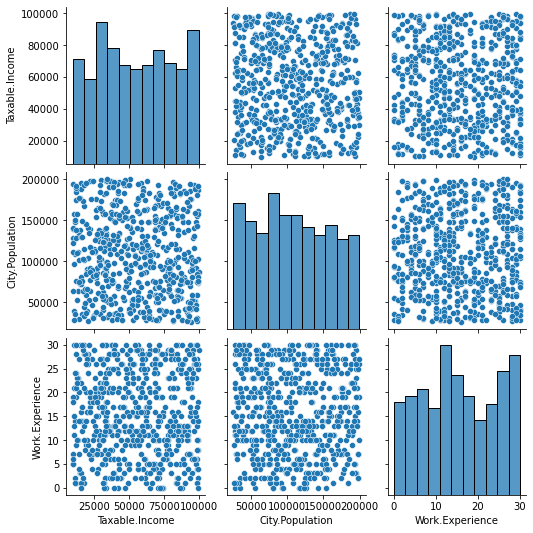

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(Fraud_check)

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

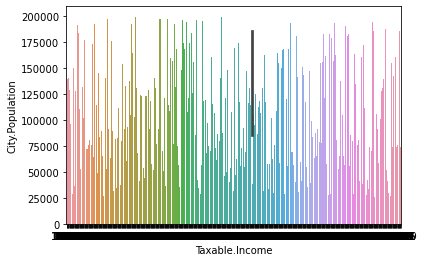

In [419]:
sns.barplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population']) 

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

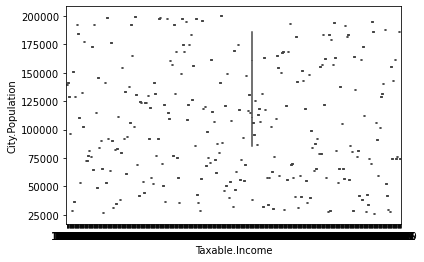

In [420]:
sns.boxplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

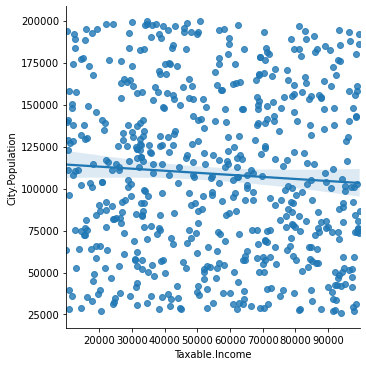

In [421]:
sns.lmplot(x='Taxable.Income',y='City.Population', data=Fraud_check)

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


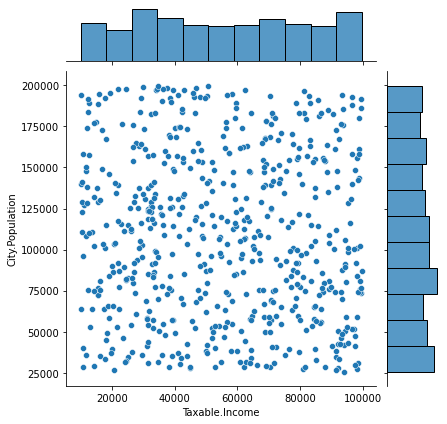

In [422]:
sns.jointplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

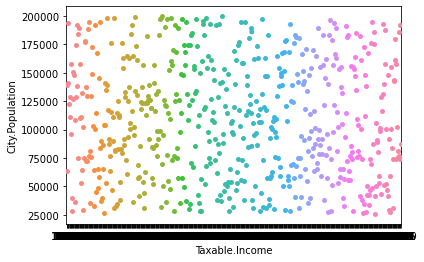

In [423]:
sns.stripplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

E:\Annoconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

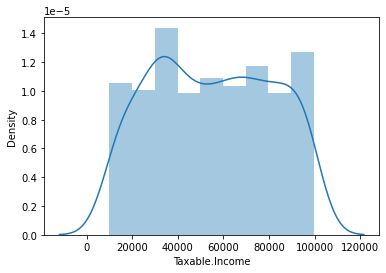

In [424]:
sns.distplot(Fraud_check['Taxable.Income'])

E:\Annoconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

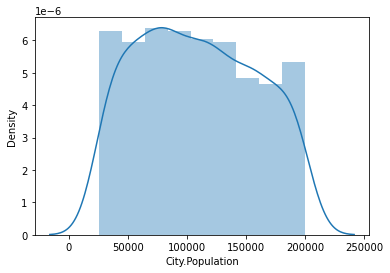

In [425]:
sns.distplot(Fraud_check['City.Population'])

## Preprocessing

In [426]:
Fraud_check.loc[Fraud_check["Taxable.Income"] <= 30000,"Taxable_Income"]="Good"
Fraud_check.loc[Fraud_check["Taxable.Income"] > 30001,"Taxable_Income"]="Risky"

In [427]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


In [441]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check["Undergrad"] = label_encoder.fit_transform(Fraud_check["Undergrad"])
Fraud_check["Marital.Status"] = label_encoder.fit_transform(Fraud_check["Marital.Status"])
Fraud_check["Urban"] = label_encoder.fit_transform(Fraud_check["Urban"])
Fraud_check["Taxable_Income"] = label_encoder.fit_transform(Fraud_check["Taxable_Income"]) 

In [442]:
Fraud_check["Taxable_Income"].unique()

array([1, 0], dtype=int64)

In [443]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [444]:
x = Fraud_check.iloc[:,0:5]
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [445]:
y = Fraud_check["Taxable_Income"]
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable_Income, Length: 600, dtype: int64

In [446]:
Fraud_check.Taxable_Income.value_counts()

1    476
0    124
Name: Taxable_Income, dtype: int64

In [447]:
colnames=list(Fraud_check.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable_Income']

## Split into train and Test Data

In [448]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [449]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5) 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Build Tree Model

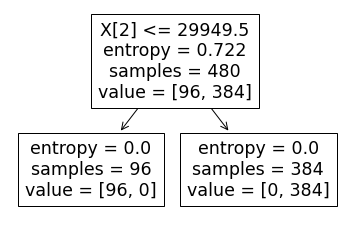

In [450]:
tree.plot_tree(model);

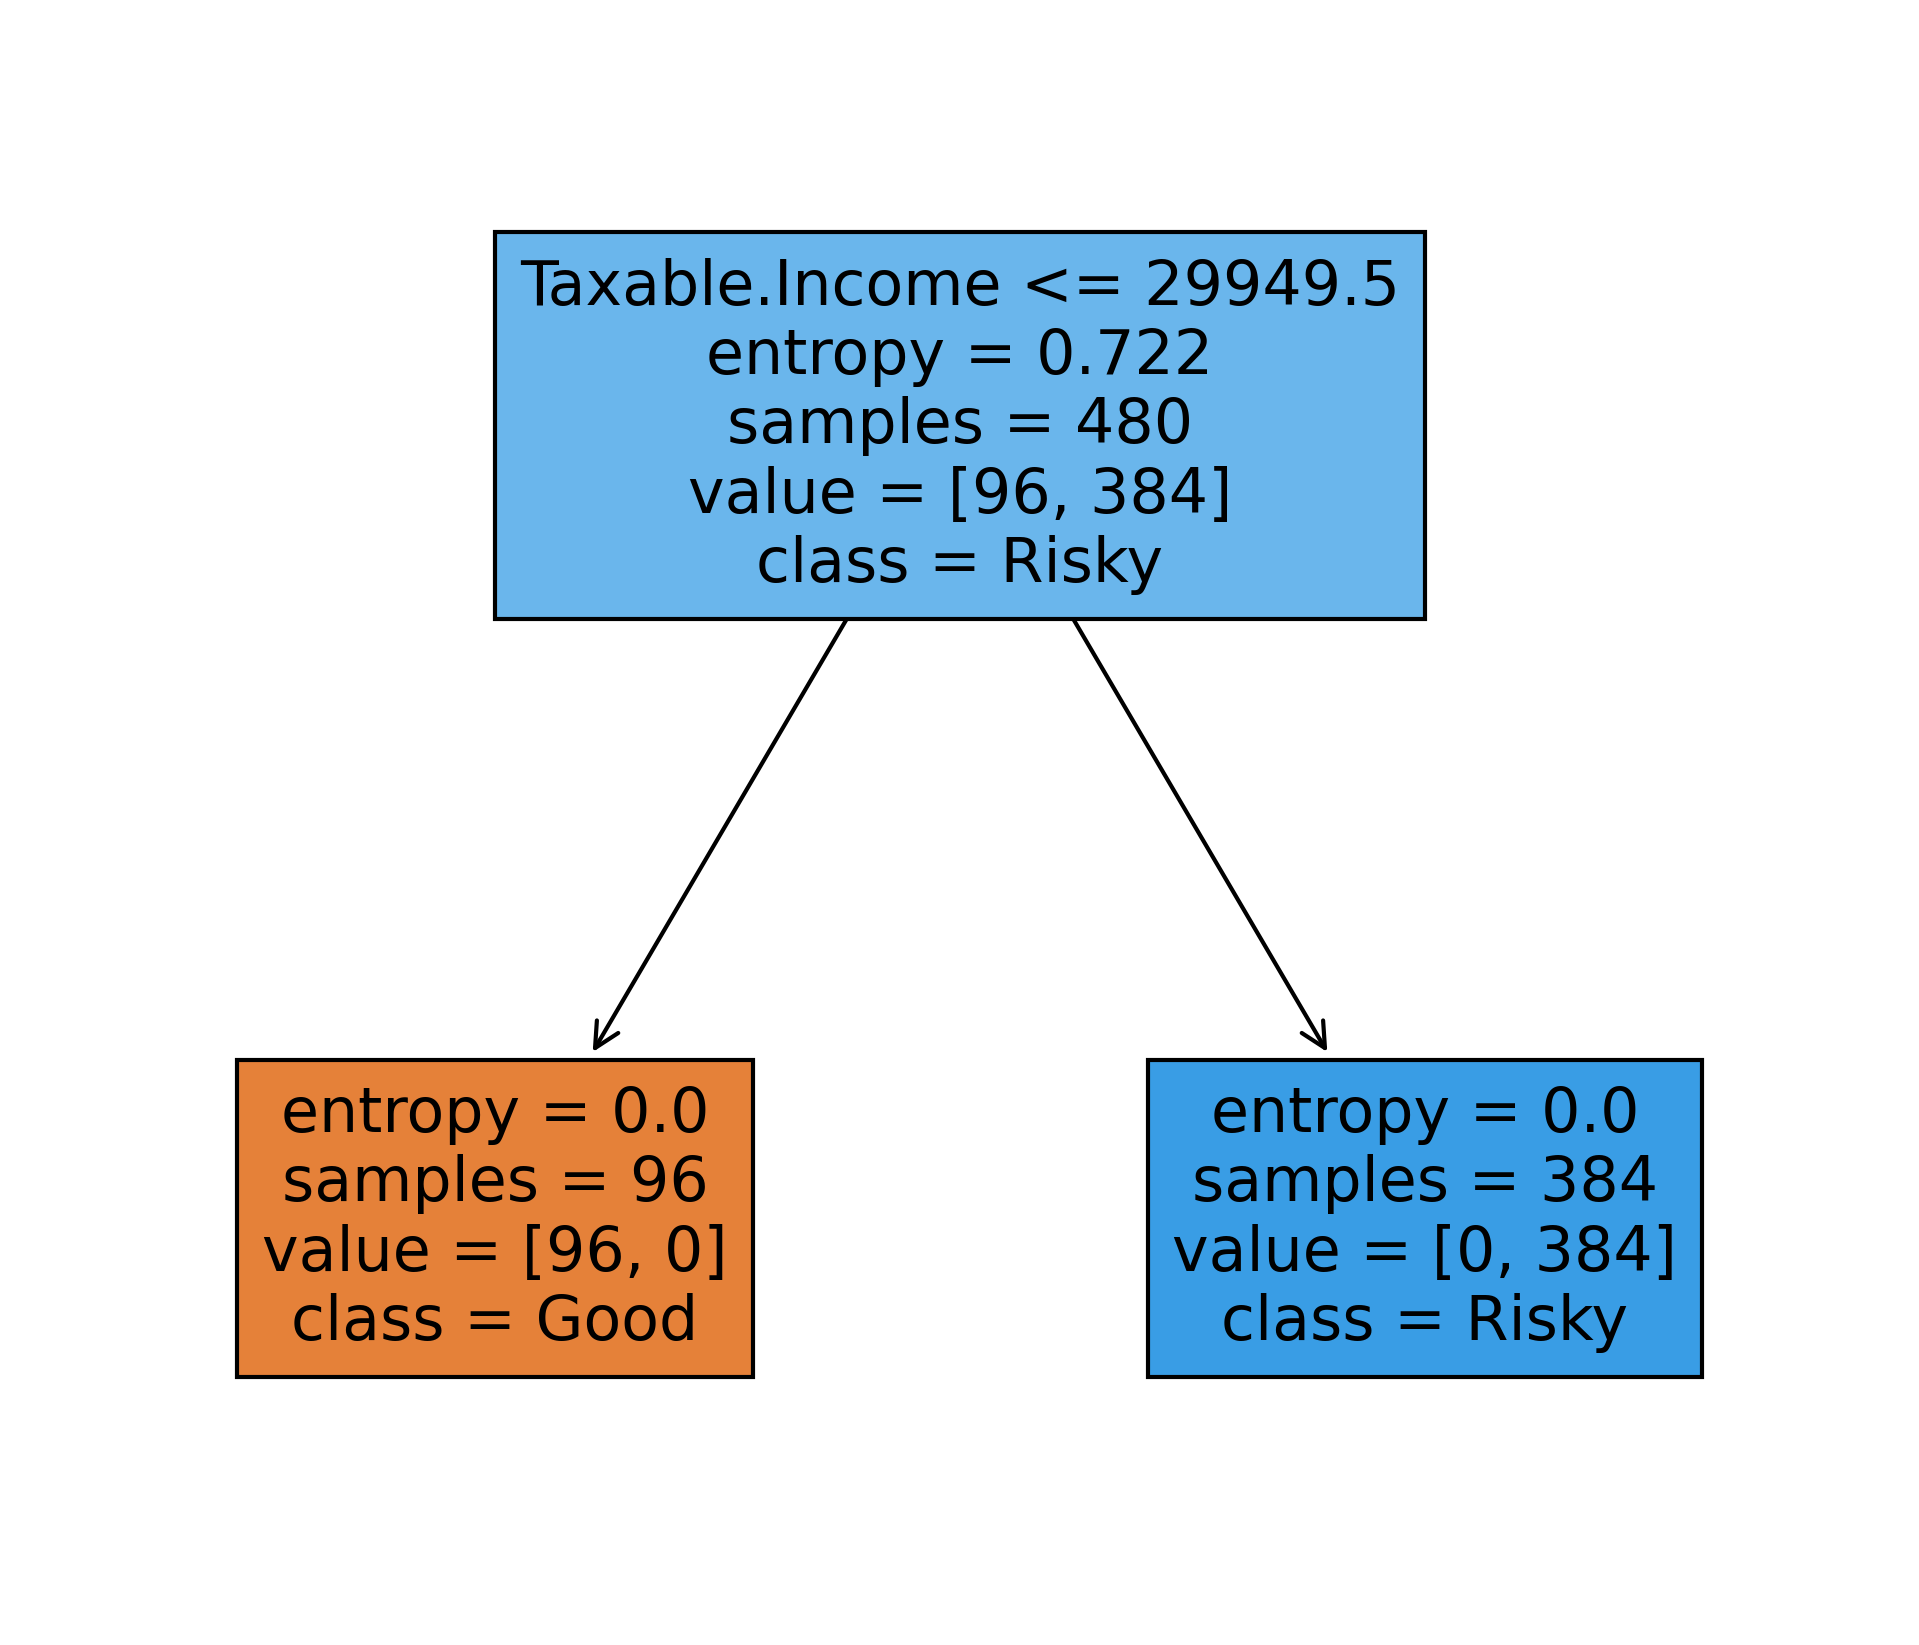

In [451]:
fn=[ 'Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [452]:
model.feature_importances_

array([0., 0., 1., 0., 0.])

In [453]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Taxable.Income     1.0
Undergrad          0.0
Marital.Status     0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

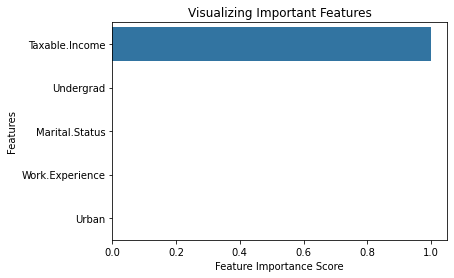

In [454]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [455]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    92
0    28
dtype: int64

In [456]:
preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [457]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable_Income,,
0,28,0
1,0,92


In [458]:
# Accuracy 
np.mean(preds==y_test)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [459]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [460]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [461]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [462]:
model.feature_importances_

array([0., 0., 1., 0., 0.])

#### Decision Tree Regression Example

In [463]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [508]:
array = Fraud_check.values
X = array[:,0:4]
y = array[:,-4]

# Spliting Dataset

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=150)

In [510]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

# Find the accuracy

In [511]:
model.score(X_test,y_test)

0.9998656993033864